<a href="https://colab.research.google.com/github/aimlresearcher/Facebook-Link-Prediction/blob/master/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Load Dataset

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
import zipfile
dataset_path = '/content/gdrive/My Drive/fb_dataset.zip'
zip_ref = zipfile.ZipFile(dataset_path, 'r')
zip_ref.extractall("/content/gdrive/My Drive/")
zip_ref.close()

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
import csv
import pandas as pd
import datetime
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
from sklearn.cluster import MiniBatchKMeans
import math
import pickle
import os
import xgboost as xgb

import networkx as nx
import pdb
import pickle

In [10]:
#reading graph
if not os.path.isfile('/content/gdrive/My Drive/FacebookRecruiting/train_woheader.csv'):
    traincsv = pd.read_csv('/content/gdrive/My Drive/FacebookRecruiting/train.csv')
    print(traincsv[traincsv.isna().any(1)])
    print(traincsv.info())
    print('Number of duplicate values: ', sum(traincsv.duplicated()))
    traincsv.to_csv('/content/gdrive/My Drive/FacebookRecruiting/train_woheader.csv', header = False, index = False)
    print("saved the graph into file")
else:
    g = nx.read_edgelist('/content/gdrive/My Drive/FacebookRecruiting/train_woheader.csv', delimiter=',', create_using=nx.DiGraph())
print(nx.info(g))

Name: 
Type: DiGraph
Number of nodes: 1862220
Number of edges: 9437519
Average in degree:   5.0679
Average out degree:   5.0679


### Dispaly SubGraph

Name: 
Type: DiGraph
Number of nodes: 66
Number of edges: 50
Average in degree:   0.7576
Average out degree:   0.7576


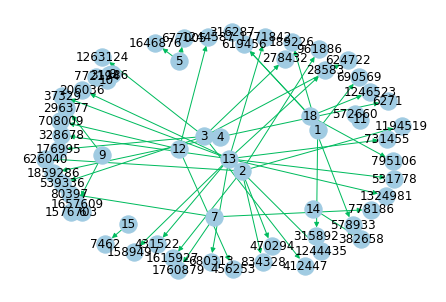

In [12]:
if not os.path.isfile('/content/gdrive/My Drive/FacebookRecruiting/train_woheader_sample.csv'):
    pd.read_csv('/content/gdrive/My Drive/FacebookRecruiting/train.csv', nrows = 50).to_csv('/content/gdrive/My Drive/FacebookRecruiting/train_woheader_sample.csv', header=False, index=False)
subgraph = nx.read_edgelist('/content/gdrive/My Drive/FacebookRecruiting/train_woheader_sample.csv', delimiter=',', create_using=nx.DiGraph(), nodetype=int)

pos = nx.spring_layout(subgraph)
nx.draw(subgraph, pos, node_color='#A0CBE2', edge_color='#00bb5e', width=1, edge_cmap=plt.cm.Blues, with_labels=True)
plt.savefig('facebook_users.pdf')
print(nx.info(subgraph))

### Exploratory Data Analysis

In [14]:
print('The number of unique persons: ', len(g.nodes()))

The number of unique persons:  1862220


### No of followers for each person

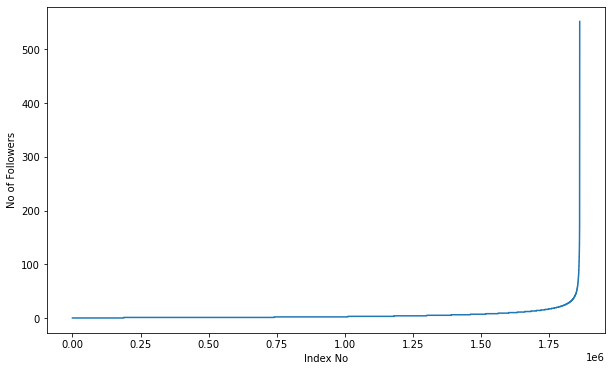

In [15]:
indegree_dist = list(dict(g.in_degree()).values())
indegree_dist.sort()
plt.figure(figsize=(10,6))
plt.plot(indegree_dist)
plt.xlabel('Index No')
plt.ylabel('No of Followers')
plt.show()

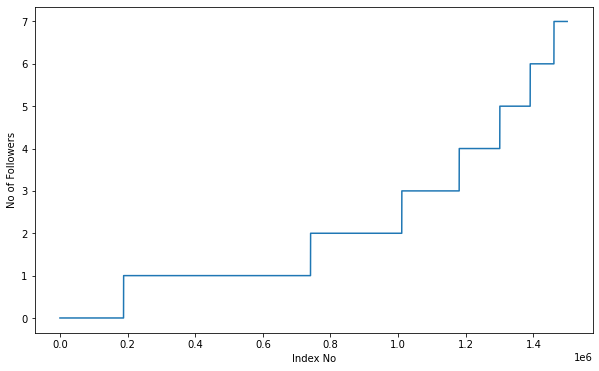

In [16]:
indegree_dist = list(dict(g.in_degree()).values())
indegree_dist.sort()
plt.figure(figsize=(10,6))
plt.plot(indegree_dist[0:1500000])
plt.xlabel('Index No')
plt.ylabel('No of Followers')
plt.show()

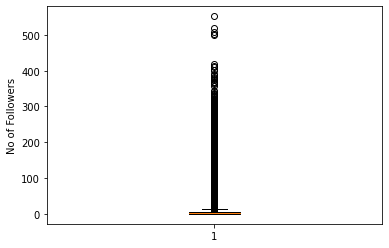

In [17]:
plt.boxplot(indegree_dist)
plt.ylabel('No of Followers')
plt.show()

In [18]:
### 90-100 percentile

for i in range(0, 11):
    print(90+i, 'percentile value is', np.percentile(indegree_dist, 90+i))

90 percentile value is 12.0
91 percentile value is 13.0
92 percentile value is 14.0
93 percentile value is 15.0
94 percentile value is 17.0
95 percentile value is 19.0
96 percentile value is 21.0
97 percentile value is 24.0
98 percentile value is 29.0
99 percentile value is 40.0
100 percentile value is 552.0


In [19]:
### 99-100 percentile

for i in range(10, 110, 10):
    print(90+(i/100), 'percentile value is', np.percentile(indegree_dist, 99+(i/100)))

90.1 percentile value is 42.0
90.2 percentile value is 44.0
90.3 percentile value is 47.0
90.4 percentile value is 50.0
90.5 percentile value is 55.0
90.6 percentile value is 61.0
90.7 percentile value is 70.0
90.8 percentile value is 84.0
90.9 percentile value is 112.0
91.0 percentile value is 552.0


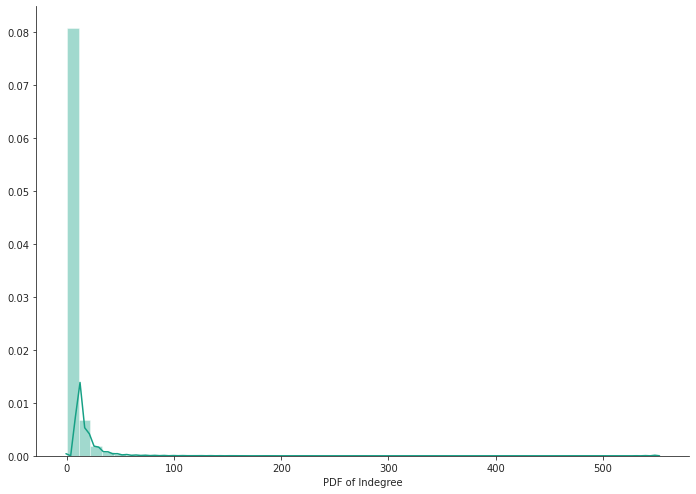

In [20]:
%matplotlib inline
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.distplot(indegree_dist, color='#16A085')
plt.xlabel('PDF of Indegree')
sns.despine()

### No of people each person is following

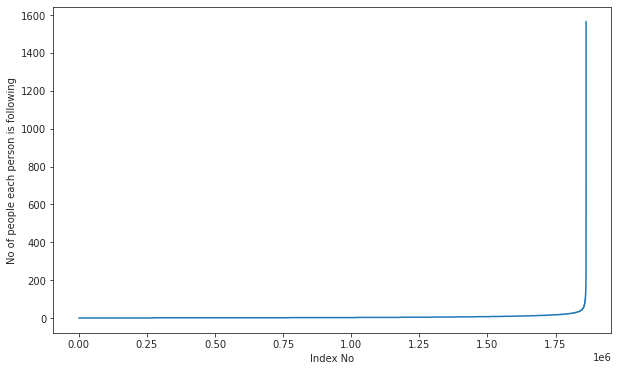

In [21]:
outdegree_dist = list(dict(g.out_degree()).values())
outdegree_dist.sort()
plt.figure(figsize=(10,6))
plt.plot(outdegree_dist)
plt.xlabel('Index No')
plt.ylabel('No of people each person is following')
plt.show()

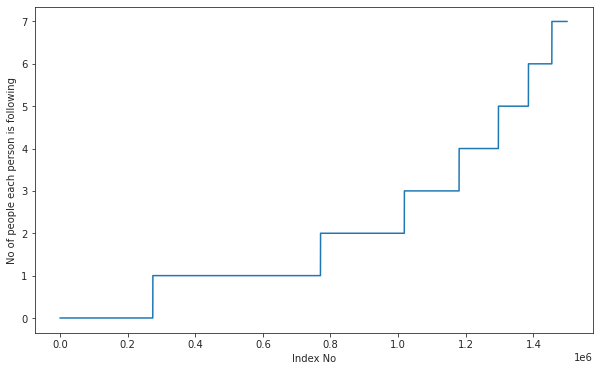

In [22]:
outdegree_dist = list(dict(g.out_degree()).values())
outdegree_dist.sort()
plt.figure(figsize=(10,6))
plt.plot(outdegree_dist[0:1500000])
plt.xlabel('Index No')
plt.ylabel('No of people each person is following')
plt.show()

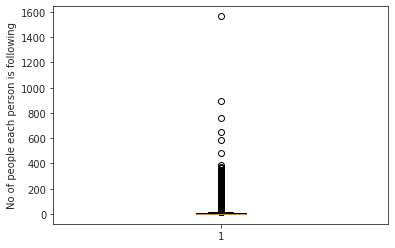

In [23]:
plt.boxplot(outdegree_dist)
plt.ylabel('No of people each person is following')
plt.show()

In [24]:
### 90-100 percentile

for i in range(0, 11):
    print(90+i, 'percentile value is', np.percentile(outdegree_dist, 90+i))


90 percentile value is 12.0
91 percentile value is 13.0
92 percentile value is 14.0
93 percentile value is 15.0
94 percentile value is 17.0
95 percentile value is 19.0
96 percentile value is 21.0
97 percentile value is 24.0
98 percentile value is 29.0
99 percentile value is 40.0
100 percentile value is 1566.0


In [25]:
### 99-100 percentile

for i in range(10, 110, 10):
    print(90+(i/100), 'percentile value is', np.percentile(outdegree_dist, 99+(i/100)))


90.1 percentile value is 42.0
90.2 percentile value is 45.0
90.3 percentile value is 48.0
90.4 percentile value is 52.0
90.5 percentile value is 56.0
90.6 percentile value is 63.0
90.7 percentile value is 73.0
90.8 percentile value is 90.0
90.9 percentile value is 123.0
91.0 percentile value is 1566.0


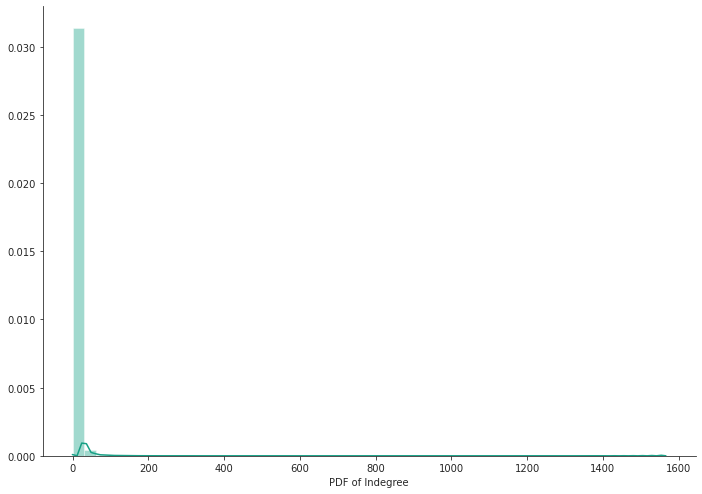

In [26]:
%matplotlib inline
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.distplot(outdegree_dist, color='#16A085')
plt.xlabel('PDF of Indegree')
sns.despine()

In [27]:
print('No of persons those are not following anyone are ', sum(np.array(outdegree_dist)==0), ' and % ', 
      (sum(np.array(outdegree_dist)==0)*100)/len(outdegree_dist))

No of persons those are not following anyone are  274512  and %  14.741115442858524


In [28]:
print('No of persons having zero followers are ', sum(np.array(indegree_dist)==0), ' and % ', 
      (sum(np.array(indegree_dist)==0)*100)/len(indegree_dist))

No of persons having zero followers are  188043  and %  10.097786512871734


In [29]:
count = 0
for i in g.nodes():
    if len(list(g.predecessors(i))) == 0:
        if len(list(g.successors(i))) == 0:
            count += 1
print('Number of persons who are not following anyone and also not having any followers are ', count)

Number of persons who are not following anyone and also not having any followers are  0


### Both Followers and following

In [30]:
from collections import Counter
dict_in = dict(g.in_degree())
dict_out = dict(g.out_degree())

d = Counter(dict_in) + Counter(dict_out)
in_out_degree = np.array(list(d.values()))

Text(0, 0.5, 'No of people each person is following + followers')

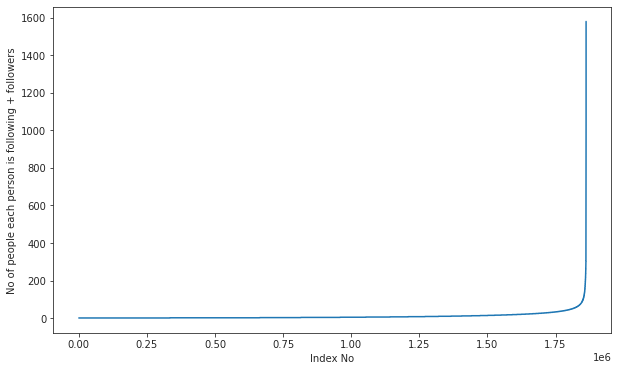

In [31]:
in_out_degree_sort = sorted(in_out_degree)
plt.figure(figsize=(10, 6))
plt.plot(in_out_degree_sort)
plt.xlabel('Index No')
plt.ylabel('No of people each person is following + followers')


Text(0, 0.5, 'No of people each person is following + followers')

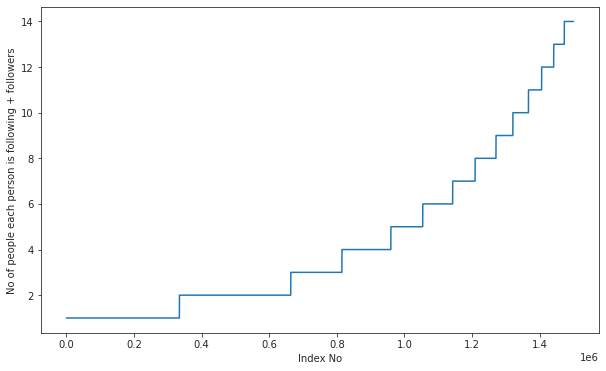

In [32]:
in_out_degree_sort = sorted(in_out_degree)
plt.figure(figsize=(10, 6))
plt.plot(in_out_degree_sort[0:1500000])
plt.xlabel('Index No')
plt.ylabel('No of people each person is following + followers')


In [33]:
### 90-100 percentile

for i in range(0, 11):
    print(90+i, 'percentile value is', np.percentile(in_out_degree_sort, 90+i))

90 percentile value is 24.0
91 percentile value is 26.0
92 percentile value is 28.0
93 percentile value is 31.0
94 percentile value is 33.0
95 percentile value is 37.0
96 percentile value is 41.0
97 percentile value is 48.0
98 percentile value is 58.0
99 percentile value is 79.0
100 percentile value is 1579.0


In [34]:
### 99-100 percentile

for i in range(10, 110, 10):
    print(90+(i/100), 'percentile value is', np.percentile(in_out_degree_sort, 99+(i/100)))


90.1 percentile value is 83.0
90.2 percentile value is 87.0
90.3 percentile value is 93.0
90.4 percentile value is 99.0
90.5 percentile value is 108.0
90.6 percentile value is 120.0
90.7 percentile value is 138.0
90.8 percentile value is 168.0
90.9 percentile value is 221.0
91.0 percentile value is 1579.0


In [35]:
print('Min of no of followers + following is ', in_out_degree.min())
print(np.sum(in_out_degree==in_out_degree.min()), ' persons having minimum number of folloers + following')

Min of no of followers + following is  1
334291  persons having minimum number of folloers + following


In [36]:
print('Min of no of followers + following is ', in_out_degree.max())
print(np.sum(in_out_degree==in_out_degree.max()), ' persons having maximum number of folloers + following')

Min of no of followers + following is  1579
1  persons having maximum number of folloers + following


In [37]:
print('No of weakly connected components ', len(list(nx.weakly_connected_components(g))))

count = 0
x = list(nx.weakly_connected_components(g))
for i in x:
    if len(i) == 2:
        count += 1
print('Weakly connected components with 2 nodes ', count)

No of weakly connected components  45558
Weakly connected components with 2 nodes  32195


# 2. Posing this Problem as a Classification Problem
### Generalizing some edges which are not present in graph for supervised learning
#### Generated bad links from graph which are not in graph and who shortest path is generated than 2.

In [39]:
%%time
###generating bad edges from given graph
import random
if not os.path.isfile('/content/gdrive/My Drive/FacebookRecruiting/missing_edges_final.p'):
    r = csv.reader(open('/content/gdrive/My Drive/FacebookRecruiting/train_woheader.csv', 'r'))
    edges = dict()
    for edge in r:
        edges[(edge[0], edge[1])] = 1

    missing_edges = set([])
    while(len(missing_edges) < 9437619):
        a = random.randint(1, 1862220)
        b = random.randint(1, 1862220)
        tmp = edges.get((a,b), -1)
        if tmp == -1 and a!=b:
            try:
                if nx.shortest_path_length(g, source=a, target=b) > 2:
                    missing_edges.add((a, b))
                else:
                    continue
            except:
                missing_edges.add((a, b))
        else:
            continue
    pickle.dump(missing_edges, open('/content/gdrive/My Drive/FacebookRecruiting/missing_edges_final.p', 'wb'))
else:
    missing_edges = pickle.load(open('/content/gdrive/My Drive/FacebookRecruiting/missing_edges_final.p', 'rb'))

CPU times: user 1min 15s, sys: 3.69 s, total: 1min 19s
Wall time: 1min 20s


In [40]:
len(missing_edges)

9437619

### Training and Test data split
### Removed edges from graph and used as test data and after removing used that graph for creating features for Train and Test data 

In [42]:
from sklearn.model_selection import train_test_split
if (not os.path.isfile('/content/gdrive/My Drive/FacebookRecruiting/train_pos_after_eda.csv')) and (not os.path.isfile('/content/gdrive/My Drive/FacebookRecruiting/train_pos_after_eda.csv')):
    df_pos = pd.read_csv('/content/gdrive/My Drive/FacebookRecruiting/train.csv')
    df_neg = pd.DataFrame(list(missing_edges), columns=['source_node', 'destination_node'])
    
    print('Number of nodes in the graph with edges ', df_pos.shape[0])
    print('Number of nodes in the graph with edges ', df_neg.shape[0])
    
    x_train_pos, x_test_pos, y_train_pos, y_test_pos = train_test_split(df_pos, np.ones(len(df_pos)), test_size=0.2, random_state=9)
    x_train_neg, x_test_neg, y_train_neg, y_test_neg = train_test_split(df_neg, np.zeros(len(df_neg)), test_size=0.2, random_state=9)
    
    print('='*60)
    print('Number of nodes in the train data graph with edges', x_train_pos.shape[0], ' = ', y_train_pos.shape[0])
    print('Number of nodes in the train data graph without edges', x_train_neg.shape[0], ' = ', y_train_neg.shape[0])
    
    print('='*60)
    print('Number of nodes in the test data graph with edges', x_test_pos.shape[0], ' = ', y_test_pos.shape[0])
    print('Number of nodes in the test data graph without edges', x_test_neg.shape[0], ' = ', y_test_neg.shape[0])
    
    x_train_pos.to_csv('/content/gdrive/My Drive/FacebookRecruiting/train_pos_after_eda.csv', header=False, index=False)
    x_test_pos.to_csv('/content/gdrive/My Drive/FacebookRecruiting/test_pos_after_eda.csv', header=False, index=False)
    x_train_neg.to_csv('/content/gdrive/My Drive/FacebookRecruiting/train_neg_after_eda.csv', header=False, index=False)
    x_test_neg.to_csv('/content/gdrive/My Drive/FacebookRecruiting/test_neg_after_eda.csv', header=False, index=False)
else:
    del missing_edges
    

Number of nodes in the graph with edges  9437519
Number of nodes in the graph with edges  9437619
Number of nodes in the train data graph with edges 7550015  =  7550015
Number of nodes in the train data graph without edges 7550095  =  7550095
Number of nodes in the test data graph with edges 1887504  =  1887504
Number of nodes in the test data graph without edges 1887524  =  1887524
